### Notebook for running pipeline in Colab

If you're running on colab: run these cells first!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
%cd /content/drive/MyDrive/BEP/git/GPT-DT
!git status
!git pull
# Choose branch name here:
!git checkout evaluation-loop

In [ ]:
%pip install -r requirements-colab.txt

In [ ]:
# CLICK RESTART RUNTIME AND THEN RUN THIS CELL
%cd /content/drive/MyDrive/BEP/git/GPT-DT

### Main Code

In [1]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sn
from main import *

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.
c:\Users\Martijn\miniconda3\envs\BEP\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
image = "vraag 17.jpg"
prompt, response, car_speed = run_program(image)

In [2]:
truth = pd.read_csv("ground-truth.csv")
results = truth.copy(deep = True)
results["Answer(word)"] = None
results["Answer(letter)"] = None
results["Speed"] = None

In [3]:
truth.head()

,Filename,Answer(letter),Answer(word),Speed
0,vraag 1.jpg,A,Brake,40
1,vraag 2.jpg,A,Brake,80
2,vraag 3.jpg,B,Release Accelerator,25
3,vraag 4.jpg,A,Brake,40
4,vraag 5.jpg,C,Nothing,30


In [ ]:
# len(truth.index)

for row in range(len(truth.index)):
    tru_row = truth.loc[row]
    res_row = results.loc[row]

    image = tru_row["Filename"]
    prompt, response, car_speed = run_program(image)
    resp_char = response.strip(' \n\t')[0]

    if resp_char == 'A':
        resp_word = "Brake"
    elif resp_char == 'B':
        resp_word = "Release Accelerator"
    elif resp_char == 'C':
        resp_word = "Nothing"
    else:
        resp_word = "unknown"

    res_row["Answer(letter)"] = resp_char
    res_row["Speed"] = car_speed
    res_row["Answer(word)"] = resp_word




In [25]:
temp_result_copy = results.head(37).copy

In [29]:
results.head(37)

,Filename,Answer(letter),Answer(word),Speed
0,vraag 1.jpg,A,Brake,40
1,vraag 2.jpg,B,Release Accelerator,80
2,vraag 3.jpg,B,Release Accelerator,25
3,vraag 4.jpg,B,Release Accelerator,40
4,vraag 5.jpg,B,Release Accelerator,30
5,vraag 6.jpg,A,Brake,40
6,vraag 7.jpg,A,Brake,100
7,vraag 8.jpg,B,Release Accelerator,30
8,vraag 9.jpg,B,Release Accelerator,100
9,vraag 10.jpg,A,Brake,30


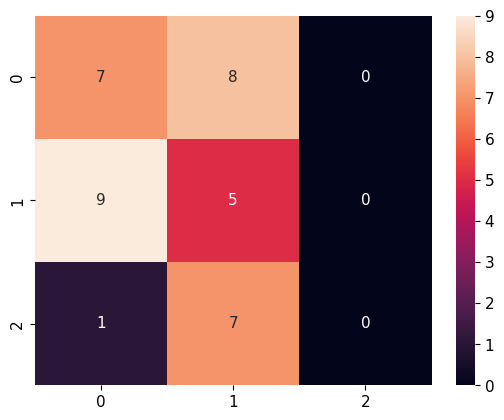

In [53]:
a = confusion_matrix(truth.head(37)[["Answer(letter)"]],results.head(37)[["Answer(letter)"]])
sn.heatmap(a, annot=True, cmap="rocket")
plt.show()